## Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

## Reading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
loan_data_train = pd.read_csv("train.csv")
loan_data_test =  pd.read_csv("test.csv")

In [3]:
loan_data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
loan_data_train.shape

(614, 13)

In [6]:
loan_data_test.shape

(367, 12)

##  Data Preprocessing 

### Checking the null values and fill it with mean for numerical data and with mode for categorical data for both train and test dataset

#### Train Data

In [7]:
loan_data_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
loan_data_train['Gender'].fillna(loan_data_train['Gender'].mode().values[0],inplace = True)
loan_data_train['Married'].fillna(loan_data_train['Married'].mode().values[0],inplace = True)
loan_data_train['Dependents'].fillna(loan_data_train['Dependents'].mode().values[0],inplace = True)
loan_data_train['Self_Employed'].fillna(loan_data_train['Self_Employed'].mode().values[0],inplace = True)
loan_data_train['LoanAmount'].fillna(loan_data_train['LoanAmount'].mean(),inplace = True)
loan_data_train['Loan_Amount_Term'].fillna(loan_data_train['Loan_Amount_Term'].mean(),inplace = True)
loan_data_train['Credit_History'].fillna(loan_data_train['Credit_History'].mean(),inplace = True)

In [9]:
loan_data_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Test Data

In [10]:
loan_data_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [11]:
loan_data_test['Gender'].fillna(loan_data_test['Gender'].mode().values[0],inplace = True)
loan_data_test['Dependents'].fillna(loan_data_test['Dependents'].mode().values[0],inplace = True)
loan_data_test['Self_Employed'].fillna(loan_data_test['Self_Employed'].mode().values[0],inplace = True)
loan_data_test['LoanAmount'].fillna(loan_data_test['LoanAmount'].mean(),inplace = True)
loan_data_test['Loan_Amount_Term'].fillna(loan_data_test['Loan_Amount_Term'].mean(),inplace = True)
loan_data_test['Credit_History'].fillna(loan_data_test['Credit_History'].mean(),inplace = True)

In [12]:
loan_data_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Data is Filled - No Null Values in the Data

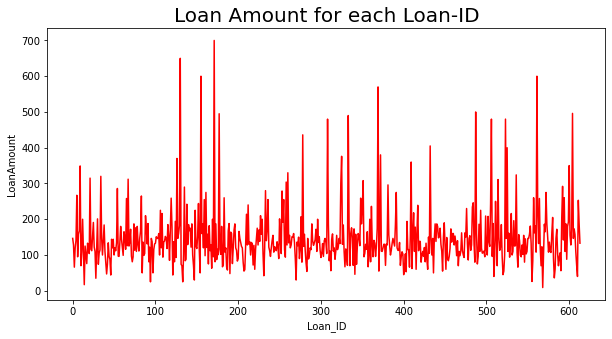

In [14]:

plt.figure(figsize=(10,5))
plt.plot(loan_data_train.index,loan_data_train['LoanAmount'],color="r")
plt.xlabel("Loan_ID")
plt.ylabel("LoanAmount")
plt.title("Loan Amount for each Loan-ID",fontsize=(20))
plt.show()

In [15]:
import seaborn as sns

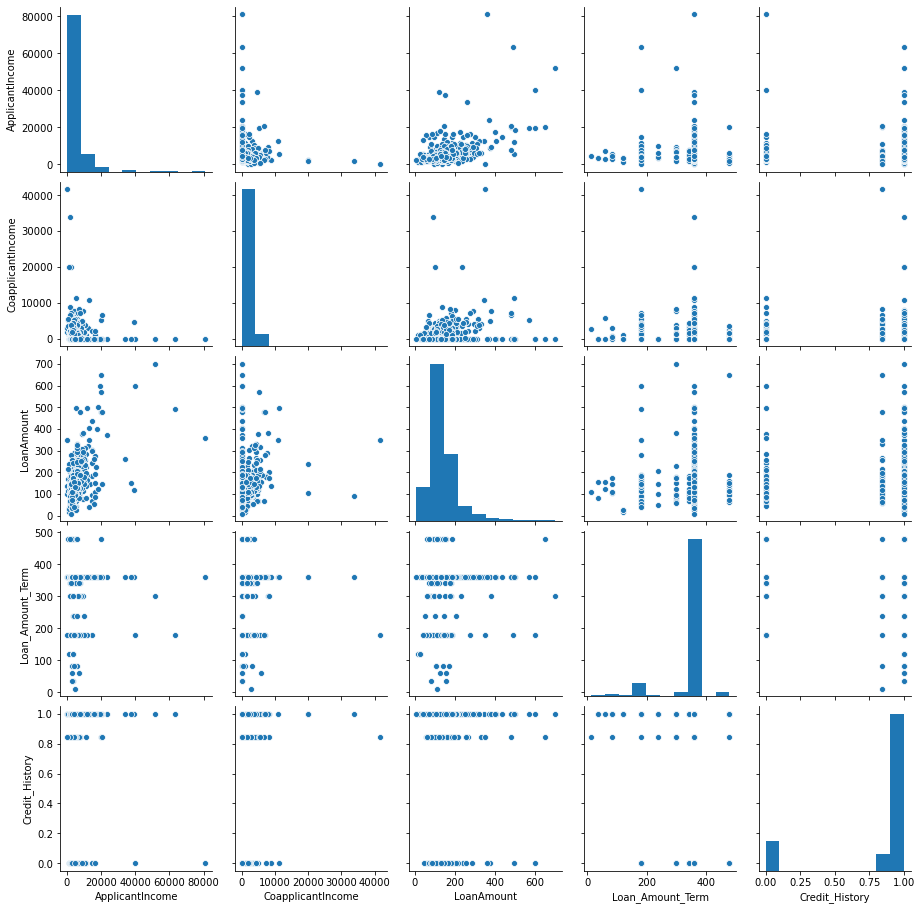

In [16]:
sns.pairplot(loan_data_train)

## Lable Encoding Data into Machine Learning Format

In [17]:
loan_data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [18]:
loan_data_t = loan_data_train.drop(['Loan_ID'],axis = 1)

In [19]:
loan_data_t.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [20]:
loan_data_t = pd.get_dummies(loan_data_t, drop_first = True)

In [21]:
loan_data_t

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,40.000000,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.000000,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583,0.0,187.000000,360.0,1.0,1,1,0,1,0,0,0,0,1,1


In [22]:
loan_data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban


In [23]:
loan_data_te = loan_data_test.drop(['Loan_ID'],axis=1)

In [24]:
loan_data_te

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.000000,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.000000,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.825444,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.000000,Rural


In [25]:
loan_data_te = pd.get_dummies(loan_data_te,drop_first= True)

In [26]:
loan_data_te

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.000000,1,1,0,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.000000,1,1,1,0,0,0,0,0,1
2,5000,1800,208.0,360.0,1.000000,1,1,0,1,0,0,0,0,1
3,2340,2546,100.0,360.0,0.825444,1,1,0,1,0,0,0,0,1
4,3276,0,78.0,360.0,1.000000,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.000000,1,1,0,0,1,1,1,0,1
363,4158,709,115.0,360.0,1.000000,1,1,0,0,0,0,0,0,1
364,3250,1993,126.0,360.0,0.825444,1,0,0,0,0,0,0,1,0
365,5000,2393,158.0,360.0,1.000000,1,1,0,0,0,0,0,0,0


In [27]:
X_train = loan_data_t.drop(['Loan_Status_Y'],axis=1)

In [28]:
X_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.000000,180.0,1.0,1,1,0,0,1,0,0,0,0
611,8072,240.0,253.000000,360.0,1.0,1,1,1,0,0,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,1,1,0,1,0,0,0,0,1


In [29]:
y_train= loan_data_t['Loan_Status_Y']

In [30]:
y_train

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: uint8

In [31]:
x_test = loan_data_te

In [32]:
x_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.000000,1,1,0,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.000000,1,1,1,0,0,0,0,0,1
2,5000,1800,208.0,360.0,1.000000,1,1,0,1,0,0,0,0,1
3,2340,2546,100.0,360.0,0.825444,1,1,0,1,0,0,0,0,1
4,3276,0,78.0,360.0,1.000000,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.000000,1,1,0,0,1,1,1,0,1
363,4158,709,115.0,360.0,1.000000,1,1,0,0,0,0,0,0,1
364,3250,1993,126.0,360.0,0.825444,1,0,0,0,0,0,0,1,0
365,5000,2393,158.0,360.0,1.000000,1,1,0,0,0,0,0,0,0


In [33]:
X_train.shape

(614, 14)

In [34]:
x_test.shape

(367, 14)

## Deploying the Model

## Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt_=DecisionTreeClassifier(random_state=1,criterion="entropy")

In [36]:
dt_.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [37]:
y_predict = dt_.predict(x_test)

In [38]:
y_predict

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [39]:
sample_data = pd.read_csv('sample.csv')

In [40]:
sample_data.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [41]:
sample_data.shape

(367, 2)

In [42]:
final_data = pd.DataFrame(y_predict, columns = ['Loan_Status'])

In [43]:
final_data.head()

,Loan_Status
0,1
1,1
2,1
3,1
4,0


In [44]:
final_data = final_data.replace(1,'Y')
final_data = final_data.replace(0,'N')


final_data.head()

In [45]:
sample_data=sample_data.drop(columns=['Loan_Status'],axis=1)


In [46]:
sample_data

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
3,LP001035
4,LP001051
...,...
362,LP002971
363,LP002975
364,LP002980
365,LP002986


In [47]:
sample_data['Loan_Status'] = final_data['Loan_Status']

In [48]:
sample_data

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [49]:
sample_data.isnull().sum()

Loan_ID        0
Loan_Status    0
dtype: int64

In [50]:
sample_data.to_csv("DTClassifiermodel.csv",index=False)

## Random Forest

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [52]:
x_train=scaler.fit_transform(X_train)

In [53]:
x_train

array([[ 0.07299082, -0.55448733,  0.        , ..., -0.39260074,
        -0.7820157 ,  1.42814704],
       [-0.13441195, -0.03873155, -0.21927331, ..., -0.39260074,
        -0.7820157 , -0.70020801],
       [-0.39374734, -0.55448733, -0.957641  , ...,  2.54711697,
        -0.7820157 ,  1.42814704],
       ...,
       [ 0.43717437, -0.47240418,  1.26937121, ..., -0.39260074,
        -0.7820157 ,  1.42814704],
       [ 0.35706382, -0.55448733,  0.4833669 , ..., -0.39260074,
        -0.7820157 ,  1.42814704],
       [-0.13441195, -0.55448733, -0.15972753, ...,  2.54711697,
         1.2787467 , -0.70020801]])

In [54]:
x_test=scaler.fit_transform(x_test)

In [55]:
x_test

array([[ 0.1864605 , -0.67333511, -0.42936789, ..., -0.33484506,
        -0.67981718,  1.27335328],
       [-0.35269225, -0.02984821, -0.16648218, ..., -0.33484506,
        -0.67981718,  1.27335328],
       [ 0.0396413 ,  0.09884917,  1.18080709, ..., -0.33484506,
        -0.67981718,  1.27335328],
       ...,
       [-0.31721094,  0.18164449, -0.16648218, ..., -0.33484506,
         1.47098372, -0.78532801],
       [ 0.0396413 ,  0.353241  ,  0.35928924, ..., -0.33484506,
        -0.67981718, -0.78532801],
       [ 0.89608667, -0.67333511, -0.62653217, ...,  2.98645591,
        -0.67981718, -0.78532801]])

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50,random_state=1)

In [57]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [58]:
y_pred_rfc = rfc.predict(x_test)

In [59]:
y_pred_rfc

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [60]:
sample_data_rfc = pd.read_csv("sample.csv")

In [61]:
sample_data_rfc.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [62]:
final_rfc =pd.DataFrame(y_pred_rfc, columns=['Loan_Status'])

In [63]:
final_rfc = final_rfc.replace(0,'N')
final_rfc = final_rfc.replace(1,'Y')

In [64]:
final_rfc

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,N
...,...
362,Y
363,Y
364,Y
365,Y


In [65]:
sample_data_rfc = sample_data_rfc.drop(columns=['Loan_Status'],axis=1)

In [66]:
sample_data_rfc.head(3)

,Loan_ID
0,LP001015
1,LP001022
2,LP001031


In [67]:
sample_data_rfc['Loan_Status'] = final_rfc['Loan_Status']

In [68]:
sample_data_rfc

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [69]:
sample_data_rfc.to_csv("RFClassifiermodel.csv",index=False)

## Pickle 

In [70]:
import pickle

In [71]:
file = open('rfc_model.pkl', 'wb')

In [72]:
pickle.dump(rfc,file)

In [73]:
file = open('rfc_model1.pkl', 'wb')

In [74]:
pickle.dump(sample_data_rfc,file)